## Doublet simulation and removal using DoubletDecon

https://satijalab.org/seurat/articles/get_started.html

#### import libraries

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### Check data quality

Saline (control) group

In [4]:
LS_sal.data <-Read10X(data.dir = "/LS-SAL-1/raw_feature_bc_matrix")

In [ ]:
LS_sal.data <-Read10X(data.dir = "/LS-SAL-1/raw_feature_bc_matrix")
colnames(LS_sal.data) = paste0(colnames(LS_sal.data),"LS_sal")
LS_sal<- CreateSeuratObject(counts = LS_sal.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_sal@meta.data$stim <- "LS_sal"

mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_sal), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_sal, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_sal, slot = 'counts'))
LS_sal[['percent.mito']] <- percent.mito

In [ ]:
FeatureScatter(object = LS_sal, feature1 = "nCount_RNA", feature2 = "percent.mito",pt.size=0.1) 
hist(LS_sal@meta.data$percent.mito,breaks=seq(0,0.7,0.01))
hist(LS_sal@meta.data$nCount_RNA,breaks=seq(0,1000000,300),xlim = c(0,8000))

Chronic morphine group

In [ ]:
LS_mor.data <-Read10X(data.dir = "/LS-MOR-1/raw_feature_bc_matrix")
colnames(LS_mor.data) = paste0(colnames(LS_mor.data),"LS_mor")
LS_mor<- CreateSeuratObject(counts = LS_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_mor@meta.data$stim <- "LS_mor"

mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object =LS_mor, slot = 'counts'))
LS_mor[['percent.mito']] <- percent.mito

In [ ]:
FeatureScatter(object = LS_mor , feature1 = "nCount_RNA", feature2 = "percent.mito",pt.size=0.1)
hist(LS_mor@meta.data$percent.mito,breaks=seq(0,0.7,0.01))
hist(LS_mor@meta.data$nCount_RNA,breaks=seq(0,1000000,300),xlim = c(0,8000))

Precipitated withdrawal group

In [ ]:
LS_nal.data <-Read10X(data.dir = "/LS-NAL-1/raw_feature_bc_matrix")
colnames(LS_nal.data) = paste0(colnames(LS_nal.data),"LS_nal")
LS_nal<- CreateSeuratObject(counts = LS_nal.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_nal@meta.data$stim <- "LS_nal"

mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_nal), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_nal, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_nal, slot = 'counts'))
LS_nal[['percent.mito']] <- percent.mito

In [ ]:
FeatureScatter(object = LS_nal , feature1 = "nCount_RNA", feature2 = "percent.mito",pt.size=0.1)
hist(LS_nal@meta.data$percent.mito,breaks=seq(0,0.7,0.01))
hist(LS_nal@meta.data$nCount_RNA,breaks=seq(0,1000000,300),xlim = c(0,8000))

Acute morphine

In [2]:
LS_one_mor.data <-Read10X(data.dir = "/Mor_single/analysis")
colnames(LS_one_mor.data) = paste0(colnames(LS_one_mor.data),"LS_one_mor")
LS_one_mor<- CreateSeuratObject(counts = LS_one_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_one_mor@meta.data$stim <- "LS_one_mor"

mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_one_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_one_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_one_mor, slot = 'counts'))
LS_one_mor[['percent.mito']] <- percent.mito

In [ ]:
head(LS_one_mor@meta.data)

In [ ]:
FeatureScatter(object = LS_one_mor , feature1 = "nCount_RNA", feature2 = "percent.mito",pt.size=0.1)
hist(LS_one_mor@meta.data$percent.mito,breaks=seq(0,0.7,0.01))
hist(LS_one_mor@meta.data$nCount_RNA,breaks=seq(0,1000000,300),xlim = c(0,8000))

Acute naloxone (drug-naive)

In [3]:
LS_nal_no_mor.data <-Read10X(data.dir = "/Nal_no_mor/analysis")
colnames(LS_nal_no_mor.data) = paste0(colnames(LS_nal_no_mor.data),"LS_nal_no_mor")
LS_nal_no_mor<- CreateSeuratObject(counts = LS_nal_no_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_nal_no_mor@meta.data$stim <- "LS_nal_no_mor"

mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_nal_no_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_nal_no_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_nal_no_mor, slot = 'counts'))
LS_nal_no_mor[['percent.mito']] <- percent.mito

In [ ]:
LS_nal_no_mor

#### Sample normalization, scaling, and dimensionality reduction for each sample separately

In [ ]:
sample<-c("LS_sal","LS_mor","LS_nal")
sample[i]

In [ ]:
LS_sal <- subset(x = LS_sal, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.1) # you may change percent.mito from 0.2 to 0.3 

LS_sal<- NormalizeData(object = LS_sal,verbose = FALSE) 

LS_sal<- FindVariableFeatures(object =LS_sal,selection.method = "vst", nfeatures = 2000, verbose = FALSE)

LS_sal<- ScaleData(object = LS_sal, features = rownames(x =LS_sal), vars.to.regress = c("nCount_RNA", "percent.mito"))

LS_sal<- RunPCA(object = LS_sal, features = VariableFeatures(object =LS_sal), verbose = FALSE)

LS_sal<- FindNeighbors(object =LS_sal, dims = 1:30)
LS_sal<- FindClusters(object = LS_sal, resolution = 0.8)

saveRDS(LS_sal,file = "/Doublet_processing/LS_sal")

In [ ]:
LS_mor <- subset(x = LS_mor, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.10) # you may change percent.mito from 0.2 to 0.3 

LS_mor<- NormalizeData(object = LS_mor,verbose = FALSE) 

LS_mor<- FindVariableFeatures(object =LS_mor,selection.method = "vst", nfeatures = 2000, verbose = FALSE)

LS_mor<- ScaleData(object = LS_mor, features = rownames(x =LS_mor), vars.to.regress = c("nCount_RNA", "percent.mito"))

LS_mor<- RunPCA(object = LS_mor, features = VariableFeatures(object =LS_mor), verbose = FALSE)

LS_mor<- FindNeighbors(object =LS_mor, dims = 1:30)
LS_mor<- FindClusters(object = LS_mor, resolution = 0.8)

saveRDS(LS_mor,file = "/Doublet_processing/LS_mor")

In [ ]:
LS_nal <- subset(x = LS_nal, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.10) # you may change percent.mito from 0.2 to 0.3 

LS_nal<- NormalizeData(object = LS_nal,verbose = FALSE) 

LS_nal<- FindVariableFeatures(object =LS_nal,selection.method = "vst", nfeatures = 2000, verbose = FALSE)

LS_nal<- ScaleData(object = LS_nal, features = rownames(x =LS_nal), vars.to.regress = c("nCount_RNA", "percent.mito"))

LS_nal<- RunPCA(object = LS_nal, features = VariableFeatures(object =LS_nal), verbose = FALSE)

LS_nal<- FindNeighbors(object =LS_nal, dims = 1:30)
LS_nal<- FindClusters(object = LS_nal, resolution = 0.8)

saveRDS(LS_nal,file = "/Doublet_processing/LS_nal")

In [4]:
LS_one_mor <- subset(x = LS_one_mor, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.10) # you may change percent.mito from 0.2 to 0.3 

In [11]:
LS_one_mor<- NormalizeData(object = LS_one_mor,verbose = FALSE) 

LS_one_mor<- FindVariableFeatures(object =LS_one_mor,selection.method = "vst", nfeatures = 2000, verbose = FALSE)

LS_one_mor<- ScaleData(object = LS_one_mor, features = rownames(x =LS_one_mor), vars.to.regress = c("nCount_RNA", "percent.mito"))

LS_one_mor<- RunPCA(object = LS_one_mor, features = VariableFeatures(object =LS_one_mor), verbose = FALSE)

LS_one_mor<- FindNeighbors(object =LS_one_mor, dims = 1:30)
LS_one_mor<- FindClusters(object = LS_one_mor, resolution = 0.8)

saveRDS(LS_one_mor,file = "/Doublet_processing/LS_one_mor")

Regressing out nCount_RNA, percent.mito
Centering and scaling data matrix
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8632
Number of edges: 301626

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9014
Number of communities: 22
Elapsed time: 0 seconds


Warning message in gzfile(file, mode):
"cannot open file '/Users/stuberadmin/Documents/scRNAseq/211119-RS/Doublet_processing/LS_one_mor': it is a directory"

ERROR: Error in gzfile(file, mode): cannot open the connection


In [14]:
saveRDS(LS_one_mor,file = "/Doublet_processing/LS_one_mor.RDS")

In [7]:
LS_nal_no_mor <- subset(x = LS_nal_no_mor, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.10) # you may change percent.mito from 0.2 to 0.3 

In [15]:
LS_nal_no_mor <- subset(x = LS_nal_no_mor, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.10) # you may change percent.mito from 0.2 to 0.3 

LS_nal_no_mor<- NormalizeData(object = LS_nal_no_mor,verbose = FALSE) 

LS_nal_no_mor<- FindVariableFeatures(object =LS_nal_no_mor,selection.method = "vst", nfeatures = 2000, verbose = FALSE)

LS_nal_no_mor<- ScaleData(object = LS_nal_no_mor, features = rownames(x =LS_nal_no_mor), vars.to.regress = c("nCount_RNA", "percent.mito"))

LS_nal_no_mor<- RunPCA(object = LS_nal_no_mor, features = VariableFeatures(object =LS_nal_no_mor), verbose = FALSE)

LS_nal_no_mor<- FindNeighbors(object =LS_nal_no_mor, dims = 1:30)
LS_nal_no_mor<- FindClusters(object = LS_nal_no_mor, resolution = 0.8)

saveRDS(LS_nal_no_mor,file = "/Doublet_processing/LS_nal_no_mor.rds")

Regressing out nCount_RNA, percent.mito
Centering and scaling data matrix
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9539
Number of edges: 371751

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9091
Number of communities: 24
Elapsed time: 0 seconds


In [ ]:
LS_sal <- RunUMAP(LS_sal, reduction='pca', dims=1:30)

In [ ]:
LS_mor <- RunUMAP(LS_mor, reduction='pca', dims=1:30)

In [ ]:
LS_nal <- RunUMAP(LS_nal, reduction='pca', dims=1:30)

In [16]:
LS_one_mor <- RunUMAP(LS_one_mor, reduction='pca', dims=1:30)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"18:28:27 UMAP embedding parameters a = 0.9922 b = 1.112
18:28:27 Read 8632 rows and found 30 numeric columns
18:28:27 Using Annoy for neighbor search, n_neighbors = 30
18:28:27 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
18:28:29 Writing NN index file to temp file C:\Users\STUBER~1\AppData\Local\Temp\RtmpoF8MPH\file3b0030e35960
18:28:29 Searching Annoy index using 1 thread, search_k = 3000
18:28:30 Annoy recall = 100%
18:28:31 Commencing smooth kNN distance calibration using 1 thread
18:28:33 Initializing from normalized Laplacian + noise

In [17]:
LS_nal_no_mor <- RunUMAP(LS_nal_no_mor, reduction='pca', dims=1:30)

18:28:51 UMAP embedding parameters a = 0.9922 b = 1.112
18:28:51 Read 9539 rows and found 30 numeric columns
18:28:51 Using Annoy for neighbor search, n_neighbors = 30
18:28:51 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
18:28:53 Writing NN index file to temp file C:\Users\STUBER~1\AppData\Local\Temp\RtmpoF8MPH\file3b006cb935d6
18:28:53 Searching Annoy index using 1 thread, search_k = 3000
18:28:55 Annoy recall = 100%
18:28:55 Commencing smooth kNN distance calibration using 1 thread
18:28:57 Initializing from normalized Laplacian + noise
18:28:57 Commencing optimization for 500 epochs, with 409678 positive edges
18:29:18 Optimization finished


#### Load in files if necessary

In [ ]:
LS_sal<-readRDS(file = "/Doublet_processing/LS_sal.rds")
LS_mor<-readRDS(file = "/Doublet_processing/LS_mor.rds")
LS_nal<-readRDS(file = "/Doublet_processing/LS_nal.rds")

In [ ]:
counts<-as.matrix(LS_sal@assays$RNA@data)
write.table(data.frame("GENE"=rownames(counts),counts),file="/LS_sal/counts.txt",row.names=FALSE,sep="\t")
markers <- FindAllMarkers(object = LS_sal, only.pos = TRUE, min.pct = 0.25)
top_50<-markers %>% group_by(cluster) %>% top_n(50)
write.table(data.frame("test"=as.character(rownames(top_50)),top_50),file="/LS_sal/Top50Genes.txt",row.names=FALSE,col.names=c("",colnames(top_50)),sep="\t",eol="\n")
cluster<-Idents(object=LS_sal)
cluster<-as.matrix(cluster)
cluster[,1]<-as.character(cluster[,1])
cluster[,0]<-as.character(cluster[,0])
cluster<-data.frame("x"=rownames(cluster),cluster)
write.table(cluster,file="/LS_sal/Cluster.txt",row.names=FALSE,col.names=c("","x"),sep="\t",eol="\n")

In [ ]:
library("DoubletDecon")
location="/Doublet_processing/LS_sal/" #Update as needed 
expressionFile=paste0(location, "counts.txt")
genesFile=paste0(location, "Top50Genes.txt")
clustersFile=paste0(location, "Cluster.txt")

newFiles=Seurat_Pre_Process(expressionFile, genesFile, clustersFile)

results=Main_Doublet_Decon(rawDataFile=newFiles$newExpressionFile, 
                           groupsFile=newFiles$newGroupsFile, 
                           filename="cntl", 
                           location=location,
                           fullDataFile=NULL, 
                           removeCC=FALSE, 
                           species="mmu", 
                           rhop=1.1, 
                           write=TRUE, 
                           PMF=TRUE, 
                           useFull=FALSE, 
                           heatmap=FALSE,
                           centroids=TRUE,
                           num_doubs=100, 
                           only50=TRUE,
                           min_uniq=4)

In [ ]:
counts<-as.matrix(LS_mor@assays$RNA@data)
write.table(data.frame("GENE"=rownames(counts),counts),file="/Doublet_processing/LS_mor/counts.txt",row.names=FALSE,sep="\t")
markers <- FindAllMarkers(object = LS_mor, only.pos = TRUE, min.pct = 0.25)
top_50<-markers %>% group_by(cluster) %>% top_n(50)
write.table(data.frame("test"=as.character(rownames(top_50)),top_50),file="/Doublet_processing/LS_mor/Top50Genes.txt",row.names=FALSE,col.names=c("",colnames(top_50)),sep="\t",eol="\n")
cluster<-Idents(object=LS_mor)
cluster<-as.matrix(cluster)
cluster[,1]<-as.character(cluster[,1])
cluster[,0]<-as.character(cluster[,0])
cluster<-data.frame("x"=rownames(cluster),cluster)
write.table(cluster,file="/Doublet_processing/LS_mor/Cluster.txt",row.names=FALSE,col.names=c("","x"),sep="\t",eol="\n")


In [ ]:
library("DoubletDecon")
location="/Doublet_processing/LS_mor/" #Update as needed 
expressionFile=paste0(location, "counts.txt")
genesFile=paste0(location, "Top50Genes.txt")
clustersFile=paste0(location, "Cluster.txt")

newFiles=Seurat_Pre_Process(expressionFile, genesFile, clustersFile)

results=Main_Doublet_Decon(rawDataFile=newFiles$newExpressionFile, 
                           groupsFile=newFiles$newGroupsFile, 
                           filename="cntl", 
                           location=location,
                           fullDataFile=NULL, 
                           removeCC=FALSE, 
                           species="mmu", 
                           rhop=1.1, 
                           write=TRUE, 
                           PMF=TRUE, 
                           useFull=FALSE, 
                           heatmap=FALSE,
                           centroids=TRUE,
                           num_doubs=100, 
                           only50=TRUE,
                           min_uniq=4)

In [ ]:
counts<-as.matrix(LS_nal@assays$RNA@data)
write.table(data.frame("GENE"=rownames(counts),counts),file="/Doublet_processing/LS_nal/counts.txt",row.names=FALSE,sep="\t")
markers <- FindAllMarkers(object = LS_nal, only.pos = TRUE, min.pct = 0.25)
top_50<-markers %>% group_by(cluster) %>% top_n(50)
write.table(data.frame("test"=as.character(rownames(top_50)),top_50),file="/Doublet_processing/LS_nal/Top50Genes.txt",row.names=FALSE,col.names=c("",colnames(top_50)),sep="\t",eol="\n")
cluster<-Idents(object=LS_nal)
cluster<-as.matrix(cluster)
cluster[,1]<-as.character(cluster[,1])
cluster[,0]<-as.character(cluster[,0])
cluster<-data.frame("x"=rownames(cluster),cluster)
write.table(cluster,file="/Doublet_processing/LS_nal/Cluster.txt",row.names=FALSE,col.names=c("","x"),sep="\t",eol="\n")

In [ ]:
library("DoubletDecon")
location="/Doublet_processing/LS_nal/" #Update as needed 
expressionFile=paste0(location, "counts.txt")
genesFile=paste0(location, "Top50Genes.txt")
clustersFile=paste0(location, "Cluster.txt")

newFiles=Seurat_Pre_Process(expressionFile, genesFile, clustersFile)

results=Main_Doublet_Decon(rawDataFile=newFiles$newExpressionFile, 
                           groupsFile=newFiles$newGroupsFile, 
                           filename="cntl", 
                           location=location,
                           fullDataFile=NULL, 
                           removeCC=FALSE, 
                           species="mmu", 
                           rhop=1.1, 
                           write=TRUE, 
                           PMF=TRUE, 
                           useFull=FALSE, 
                           heatmap=FALSE,
                           centroids=TRUE,
                           num_doubs=100, 
                           only50=TRUE,
                           min_uniq=4)

In [18]:
counts<-as.matrix(LS_one_mor@assays$RNA@data)
write.table(data.frame("GENE"=rownames(counts),counts),file="/Doublet_processing/LS_one_mor/counts.txt",row.names=FALSE,sep="\t")
markers <- FindAllMarkers(object = LS_one_mor, only.pos = TRUE, min.pct = 0.25)
top_50<-markers %>% group_by(cluster) %>% top_n(50)
write.table(data.frame("test"=as.character(rownames(top_50)),top_50),file="/Doublet_processing/LS_one_mor/Top50Genes.txt",row.names=FALSE,col.names=c("",colnames(top_50)),sep="\t",eol="\n")
cluster<-Idents(object=LS_one_mor)
cluster<-as.matrix(cluster)
cluster[,1]<-as.character(cluster[,1])
cluster[,0]<-as.character(cluster[,0])
cluster<-data.frame("x"=rownames(cluster),cluster)
write.table(cluster,file="/Doublet_processing/LS_one_mor/Cluster.txt",row.names=FALSE,col.names=c("","x"),sep="\t",eol="\n")

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16
Calculating cluster 17
Calculating cluster 18
Calculating cluster 19
Calculating cluster 20
Calculating cluster 21
Selecting by gene


Loading packages...


Warning message:
"package 'limSolve' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'gplots' was built under R version 3.6.3"Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'clusterProfiler'"Warning message:
"package 'GenomicFeatures' was built under R version 3.6.2"Warning message:
"package 'S4Vectors' was built under R version 3.6.3"Warning message:
"package 'IRanges' was built under R version 3.6.2"Warning message:
"package 'GenomeInfoDb' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'R.utils' was built under R version 3.6.3"Warning message:
"package 'R.oo' was built under R version 3.6.3"Warning message:
"package 'R.methodsS3' was built under R version 3.6.3"Warning message:
"package 'foreach' was built under R version 3.6.3"Warning message:
"pac

Reading data...
Processing raw data...
Combining similar clusters...
Creating synthetic doublet profiles...
svd calculated PCA
Importance of component(s):
                 PC1    PC2     PC3     PC4     PC5     PC6     PC7     PC8
R2            0.4229 0.0429 0.01994 0.01651 0.01266 0.01167 0.01043 0.00939
Cumulative R2 0.4229 0.4658 0.48571 0.50222 0.51488 0.52655 0.53698 0.54637
                  PC9    PC10    PC11    PC12    PC13
R2            0.00875 0.00791 0.00705 0.00535 0.00513
Cumulative R2 0.55512 0.56303 0.57008 0.57543 0.58056

 Attention: the number of pure cell types = 13  defined in the signature matrix;

 PCA results indicate that the number of cell types in the mixtures = 1 
Step 1: Removing possible doublets...
svd calculated PCA
Importance of component(s):
                 PC1     PC2     PC3     PC4     PC5    PC6     PC7     PC8
R2            0.3759 0.05711 0.03498 0.01571 0.01077 0.0084 0.00784 0.00686
Cumulative R2 0.3759 0.43303 0.46801 0.48372 0.49449 0.5029 0.

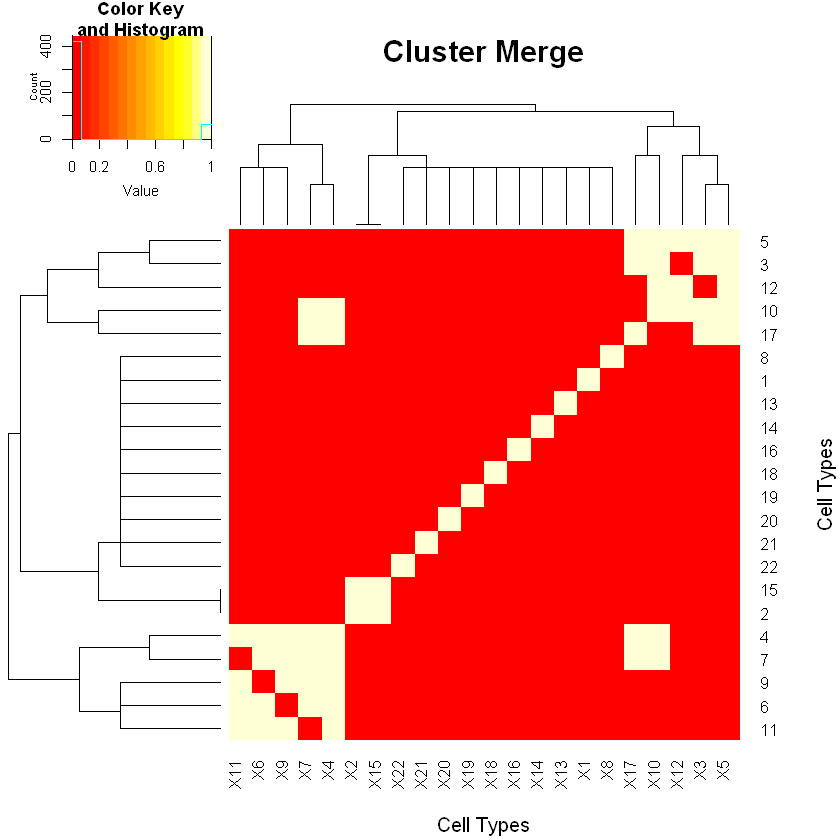

In [19]:
library("DoubletDecon")
location=LS_one_mor/" #Update as needed 
expressionFile=paste0(location, "counts.txt")
genesFile=paste0(location, "Top50Genes.txt")
clustersFile=paste0(location, "Cluster.txt")

newFiles=Seurat_Pre_Process(expressionFile, genesFile, clustersFile)

results=Main_Doublet_Decon(rawDataFile=newFiles$newExpressionFile, 
                           groupsFile=newFiles$newGroupsFile, 
                           filename="cntl", 
                           location=location,
                           fullDataFile=NULL, 
                           removeCC=FALSE, 
                           species="mmu", 
                           rhop=1.1, 
                           write=TRUE, 
                           PMF=TRUE, 
                           useFull=FALSE, 
                           heatmap=FALSE,
                           centroids=TRUE,
                           num_doubs=100, 
                           only50=TRUE,
                           min_uniq=4)

In [20]:
counts<-as.matrix(LS_nal_no_mor@assays$RNA@data)
write.table(data.frame("GENE"=rownames(counts),counts),file="/Doublet_processing/LS_nal_no_mor/counts.txt",row.names=FALSE,sep="\t")
markers <- FindAllMarkers(object = LS_nal_no_mor, only.pos = TRUE, min.pct = 0.25)
top_50<-markers %>% group_by(cluster) %>% top_n(50)
write.table(data.frame("test"=as.character(rownames(top_50)),top_50),file="/Doublet_processing/LS_nal_no_mor/Top50Genes.txt",row.names=FALSE,col.names=c("",colnames(top_50)),sep="\t",eol="\n")
cluster<-Idents(object=LS_nal_no_mor)
cluster<-as.matrix(cluster)
cluster[,1]<-as.character(cluster[,1])
cluster[,0]<-as.character(cluster[,0])
cluster<-data.frame("x"=rownames(cluster),cluster)
write.table(cluster,file="/Doublet_processing/LS_nal_no_mor/Cluster.txt",row.names=FALSE,col.names=c("","x"),sep="\t",eol="\n")

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16
Calculating cluster 17
Calculating cluster 18
Calculating cluster 19
Calculating cluster 20
Calculating cluster 21
Calculating cluster 22
Calculating cluster 23
Selecting by gene


Loading packages...


Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'clusterProfiler'"

Reading data...
Processing raw data...
Combining similar clusters...
Creating synthetic doublet profiles...
svd calculated PCA
Importance of component(s):
                 PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8
R2            0.3196 0.04234 0.02653 0.02282 0.01502 0.01331 0.01275 0.01093
Cumulative R2 0.3196 0.36199 0.38852 0.41134 0.42636 0.43967 0.45242 0.46335
                  PC9    PC10    PC11    PC12
R2            0.01016 0.00776 0.00725 0.00619
Cumulative R2 0.47351 0.48127 0.48852 0.49471

 Attention: the number of pure cell types = 12  defined in the signature matrix;

 PCA results indicate that the number of cell types in the mixtures = 1 
Step 1: Removing possible doublets...
svd calculated PCA
Importance of component(s):
                 PC1     PC2     PC3     PC4    PC5     PC6     PC7     PC8
R2            0.2909 0.04934 0.03484 0.02441 0.0102 0.00923 0.00658 0.00597
Cumulative R2 0.2909 0.34027 0.37511 0.39952 0.4097 0.41895 0.42553 0.43150
       

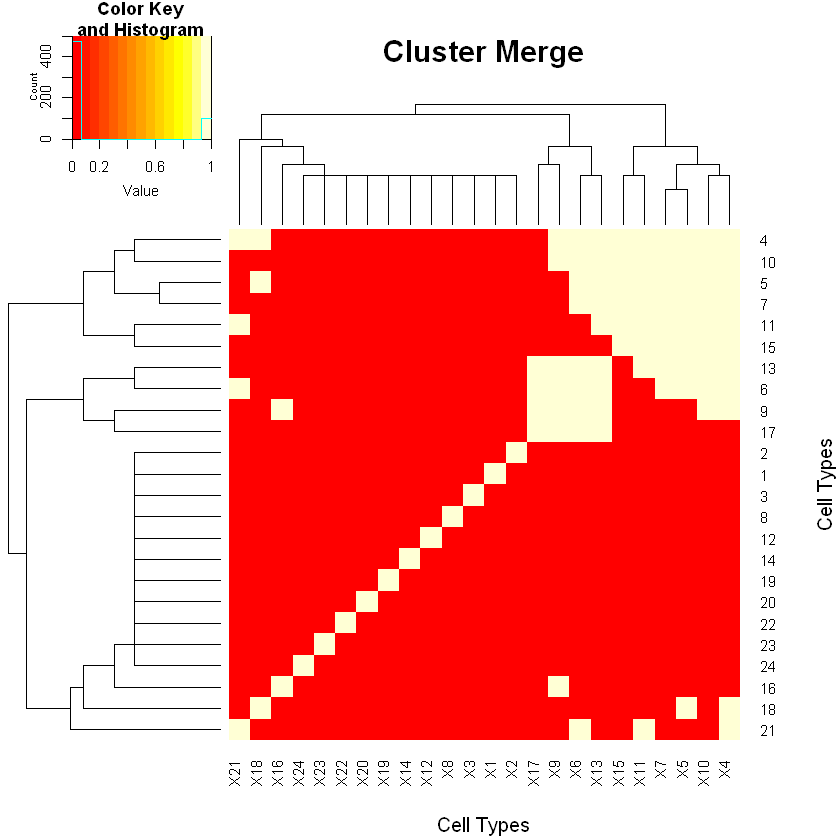

In [22]:
library("DoubletDecon")
location=LS_nal_no_mor/" #Update as needed 
expressionFile=paste0(location, "counts.txt")
genesFile=paste0(location, "Top50Genes.txt")
clustersFile=paste0(location, "Cluster.txt")

newFiles=Seurat_Pre_Process(expressionFile, genesFile, clustersFile)

results=Main_Doublet_Decon(rawDataFile=newFiles$newExpressionFile, 
                           groupsFile=newFiles$newGroupsFile, 
                           filename="cntl", 
                           location=location,
                           fullDataFile=NULL, 
                           removeCC=FALSE, 
                           species="mmu", 
                           rhop=1.1, 
                           write=TRUE, 
                           PMF=TRUE, 
                           useFull=FALSE, 
                           heatmap=FALSE,
                           centroids=TRUE,
                           num_doubs=100, 
                           only50=TRUE,
                           min_uniq=4)

# checking doublet results and barcode 

In [ ]:
LS_sal.data <-Read10X(data.dir = "/LS-SAL-1/raw_feature_bc_matrix")
colnames(LS_sal.data) = paste0(colnames(LS_sal.data),"LS_sal")
LS_sal<- CreateSeuratObject(counts = LS_sal.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_sal@meta.data$stim <- "LS_sal"

LS_sal_clean<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/201130/Doublet_processing/LS_sal/Final_nondoublets_groups_cntl.txt"))
LS_sal_doublet<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/201130/Doublet_processing/LS_sal/Final_doublets_groups_cntl.txt"))
doubletrate_LS_sal<-100*length(LS_sal_doublet)/(length(LS_sal_clean)+length(LS_sal_doublet))
doubletrate_LS_sal
LS_sal<-subset(x=LS_sal,cells=LS_sal_clean)

In [ ]:
LS_mor.data <-Read10X(data.dir = "/LS-MOR-1/raw_feature_bc_matrix")
colnames(LS_mor.data) = paste0(colnames(LS_mor.data),"LS_mor")
LS_mor<- CreateSeuratObject(counts = LS_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_mor@meta.data$stim <- "LS_mor"

LS_mor_clean<-rownames(read.table(file="/Doublet_processing/LS_mor/Final_nondoublets_groups_cntl.txt"))
LS_mor_doublet<-rownames(read.table(file="/Doublet_processing/LS_mor/Final_doublets_groups_cntl.txt"))
doubletrate_LS_mor<-100*length(LS_mor_doublet)/(length(LS_mor_clean)+length(LS_mor_doublet))
doubletrate_LS_mor

In [ ]:
LS_nal.data <-Read10X(data.dir = "/LS-NAL-1/raw_feature_bc_matrix")
colnames(LS_nal.data) = paste0(colnames(LS_nal.data),"LS_nal")
LS_nal<- CreateSeuratObject(counts = LS_nal.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_nal@meta.data$stim <- "LS_nal"

LS_nal_clean<-rownames(read.table(file="/Doublet_processing/LS_nal/Final_nondoublets_groups_cntl.txt"))
LS_nal_doublet<-rownames(read.table(file="/Doublet_processing/LS_nal/Final_doublets_groups_cntl.txt"))
doubletrate_LS_nal<-100*length(LS_nal_doublet)/(length(LS_nal_clean)+length(LS_nal_doublet))
doubletrate_LS_nal

In [23]:
LS_one_mor.data <-Read10X(data.dir = "/Mor_single/analysis")
colnames(LS_one_mor.data) = paste0(colnames(LS_one_mor.data),"LS_one_mor")
LS_one_mor<- CreateSeuratObject(counts = LS_one_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_one_mor@meta.data$stim <- "LS_one_mor"

LS_one_mor_clean<-rownames(read.table(file=LS_one_mor/Final_nondoublets_groups_cntl.txt"))
LS_one_mor_doublet<-rownames(read.table(file=LS_one_mor/Final_doublets_groups_cntl.txt"))
doubletrate_LS_one_mor<-100*length(LS_one_mor_doublet)/(length(LS_one_mor_clean)+length(LS_one_mor_doublet))
doubletrate_LS_one_mor

[1] 10.65802

In [25]:
LS_nal_no_mor.data <-Read10X(data.dir = "/Nal_no_mor/analysis")
colnames(LS_nal_no_mor.data) = paste0(colnames(LS_nal_no_mor.data),"LS_nal_no_mor")
LS_nal_no_mor<- CreateSeuratObject(counts = LS_nal_no_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_nal_no_mor@meta.data$stim <- "LS_nal_no_mor"

LS_nal_no_mor_clean<-rownames(read.table(file=LS_nal_no_mor/Final_nondoublets_groups_cntl.txt"))
LS_nal_no_mor_doublet<-rownames(read.table(file=LS_nal_no_mor/Final_doublets_groups_cntl.txt"))
doubletrate_LS_nal_no_mor<-100*length(LS_nal_no_mor_doublet)/(length(LS_nal_no_mor_clean)+length(LS_nal_no_mor_doublet))
doubletrate_LS_nal_no_mor

[1] 7.485061